In [9]:
import os
import torch
import torchvision
from torch.autograd import Variable

# Visualizing data
import matplotlib.pyplot as plt
import numpy as np
import imageio
from imageio import get_reader
%matplotlib inline

In [6]:
def transformationMatrix(dim, stride, batch_size, torch_=True):
    t = np.zeros([batch_size, dim, dim], dtype=float)
    for i in range(dim):
        if i % stride == 0:
            t[:,i,i] = 0
        else:
            t[:,i,i] = 1
    if torch_:
        t = torch.tensor(t, dtype=float, device=torch.device("cuda:0")).float()
    return t

(1, 1, 384, 384)


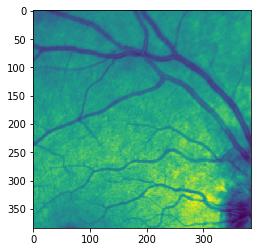

In [13]:
mov = get_reader('./data/targets/1D02F690.tif')
frame = []
for i, item in enumerate(mov):
    frame.append(item[:,:,0])
frame = np.array([frame])
_,_, r, c = frame.shape
frame = frame[:,:,:int(r/2),:int(c/2)]
print(frame.shape)
fig, ax = plt.subplots(1,1)
ax.cla()
ax.imshow(frame[0,0,:,:])

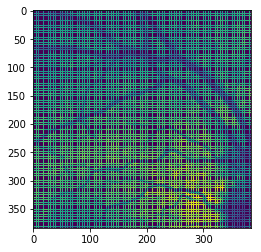

In [127]:
t_test = torch.unsqueeze(torch.tensor(transformationMatrix(384, 3, 1, torch_=False)), 1).numpy()
f_edit = frame-np.matmul(np.matmul(t_test, frame), t_test)



plt.imshow(f_edit[0,0])
plt.show()

In [128]:
f_edit[0,0]

array([[111., 108., 107., ..., 152., 154., 157.],
       [110.,   0.,   0., ..., 156.,   0.,   0.],
       [108.,   0.,   0., ..., 157.,   0.,   0.],
       ...,
       [169., 168., 164., ...,  99., 104., 107.],
       [171.,   0.,   0., ..., 102.,   0.,   0.],
       [170.,   0.,   0., ..., 103.,   0.,   0.]])

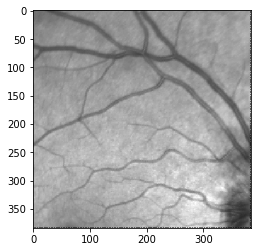

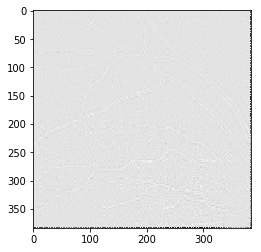

In [130]:
import numpy as np
def lin_int_grid(im):
    copy_im = np.zeros((im.shape)).astype(int)
    for j, row in enumerate(im):
        interpol_start = 0
        interpol_end = -1
        previous_pixel = 0
        for i, pixel in enumerate(row):
            if pixel != 0 and i != 0:
                if row[interpol_start] != 0:
                    interpol_end = i
                    new_seg = np.linspace(row[interpol_start], row[interpol_end], interpol_end+1-interpol_start).astype(int)
                    copy_im[j,interpol_start:interpol_end+1] = new_seg
                interpol_start = i
    return copy_im
t_test = torch.unsqueeze(torch.tensor(transformationMatrix(384, 3, 1, torch_=False)), 1).numpy()
f_edit = frame-np.matmul(np.matmul(t_test, frame), t_test)
int_im = (lin_int_grid(f_edit[0,0]) + np.transpose(lin_int_grid(np.transpose(f_edit[0,0]))))/2
plt.imshow(int_im, cmap="gray")
plt.show()
plt.imshow(int_im-frame[0,0], cmap="gray")
plt.show()

In [131]:
var_im = np.var(int_im)
PSNR = var_im/255
print(PSNR)

3.4372344201917193
